## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [1]:
import pickle
import numpy as np

# данные получены с помощью функции make_classification 
with open('7_10_clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])


In [2]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4).fit(X)

/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


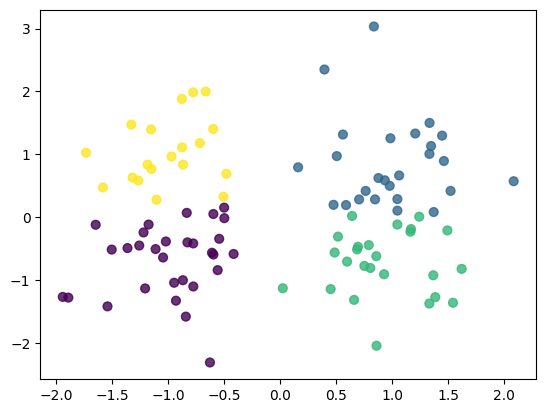

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=40, c=model.labels_, marker='o', alpha=0.8)
plt.show()

In [4]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, model.labels_)

print("Качество кластеризации по метрике силуэтта %.3f" % score)

Качество кластеризации по метрике силуэтта 0.442



### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [5]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

model = KMeans(n_clusters=4).fit(X)
score = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')

print("Качество кластеризации по метрике AMI %.3f" % score)

Качество кластеризации по метрике AMI 0.583


/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
model.inertia_

48.4719989959895


### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('7_10_clustering_hw.csv')
X = df.values

In [19]:
y = X[:,-1]
y

array([2., 2., 1., 0., 1., 1., 1., 1., 1., 1., 2., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 2., 0., 1., 0., 1., 0., 1., 2., 1., 2., 1., 0., 2., 0.,
       0., 0., 0., 2., 1., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1.,
       2., 2., 1., 0., 2., 0., 0., 0., 1., 2., 1., 0., 2., 2., 2., 1., 2.,
       0., 0., 1., 2., 0., 1., 2., 2., 0., 0., 2., 1., 1., 0., 0., 2., 2.,
       0., 2., 1., 0., 2., 1., 2., 0., 2., 2., 0., 0., 1., 2., 0., 2., 1.,
       1., 1., 2., 1., 1., 0., 0., 2., 2., 1., 2., 0., 1., 0., 2., 2., 0.,
       2., 0., 2., 1., 0., 0., 1., 2., 0., 1., 1., 0., 1., 0., 1., 2., 1.,
       0., 0., 1., 2., 0., 2., 1., 1., 2., 0., 0., 0., 2., 1., 0., 0., 2.,
       2., 1., 1., 0., 0., 1., 1., 0., 2., 1., 1., 2., 0., 1., 2., 2., 1.,
       0., 0., 2., 2., 2., 2., 2., 0., 1., 2., 0., 1., 0., 0., 1., 2., 2.,
       1., 1., 0., 1., 1., 2., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       2., 0., 2., 1., 2., 2., 0., 2., 0., 0., 0., 2., 0., 0., 2., 0., 0.,
       2., 2., 2., 2., 2.

In [21]:
X=X[:,0:2]
X

array([[ 6.22134340e+00,  4.96875257e+00],
       [ 7.36089211e+00,  8.85745517e+00],
       [-1.08177799e-01,  4.73072345e+00],
       [ 3.12735827e+00,  1.92798607e+00],
       [-8.17259333e-01,  6.75997401e+00],
       [-4.53953063e-01,  5.13148343e+00],
       [ 1.86343462e-01,  5.41642130e+00],
       [ 3.02666005e-01,  4.54470960e+00],
       [ 1.77307347e+00,  5.43644781e+00],
       [-2.01194999e-01,  6.36651577e+00],
       [ 7.53677894e+00,  6.80970021e+00],
       [ 2.20731177e+00,  3.45620756e+00],
       [-2.88797561e-01,  5.14658347e+00],
       [-9.16017813e-01,  6.80423821e+00],
       [ 3.16354043e-01,  3.92677632e+00],
       [ 3.89160565e+00,  2.60897948e+00],
       [ 4.08313985e+00,  4.35087130e+00],
       [-8.28687021e-02,  5.44073623e+00],
       [ 3.89736756e+00,  2.78988611e+00],
       [ 8.17438634e-01,  5.88162649e+00],
       [ 7.18583278e+00,  7.54925513e+00],
       [ 3.15082847e+00,  2.07989415e+00],
       [ 1.28227087e+00,  4.61542980e+00],
       [ 4.

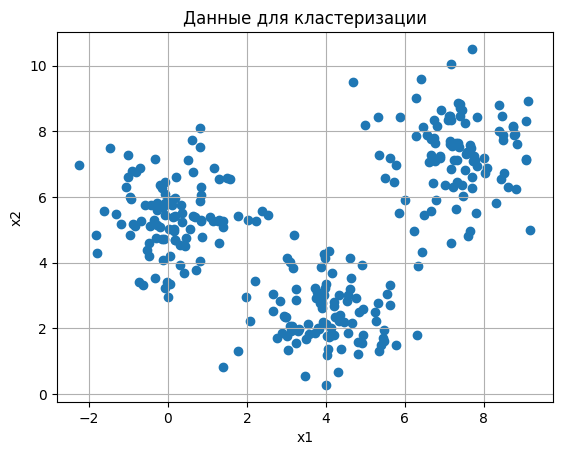

In [23]:
plt.scatter(X[:,0],X[:,1])
plt.title("Данные для кластеризации")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

In [24]:
inertias = []
for k in range(1,10):
    model = KMeans(n_clusters=k,random_state=42).fit(X)
    inertias.append(model.inertia_)


/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

Чем меньше inertia_, тем лучше данные подогнаны под кластеры.

Но если увеличивать число кластеров k, inertia будет всегда уменьшаться.

Поэтому для выбора хорошего k используют метод локтя — ищут точку, где уменьшение замедляется.

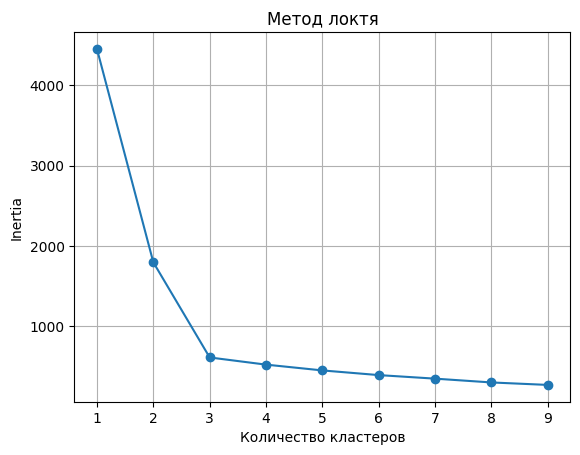

In [25]:
plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel("Количество кластеров")
plt.ylabel("Inertia")
plt.title("Метод локтя")
plt.grid(True)
plt.show()

In [26]:
k = 3  #  то значение, что дало излом
model = KMeans(n_clusters=k, random_state=42)
model.fit(X)
labels = model.predict(X)

/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
point1 = np.array([[5, 8]])
point2 = np.array([[0, 5]])

label1 = model.predict(point1)[0]
label2 = model.predict(point2)[0]

print(f"Точка (5, 8) в кластере: {label1}")
print(f"Точка (0, 5) в кластере: {label2}")

if label1 == label2:
    print("Обе точки в одном кластере.")
else:
    print("Точки в разных кластерах.")

Точка (5, 8) в кластере: 0
Точка (0, 5) в кластере: 2
Точки в разных кластерах.


In [28]:
from sklearn.metrics import adjusted_mutual_info_score
ami_score = adjusted_mutual_info_score(y, labels)
print(f"AMI score: {ami_score:.3f}")


AMI score: 0.970
